## Grouping Objects by similarity using k-means
* __k-means__ clustering belongs to the category of __prototype-based clustering.__
* __Prototype-based clustering__ means that each cluster is represented by a prototype, which can either be the __centroid (average)__ of similar points with continuous features, or the __medoid (the most representative or most frequently occurring point)__ in the case of categorical features.
* Easy to implement as well as computationally very efficient as compared to other clustering algorithms.
* We have to specify the number of clusters k a priori.
* An inappropriate choice for k can result in poor clustering performance.

In [40]:
'''function to save image'''
def saveimg(name='fig'):
    if not os.path.exists(os.path.join(os.getcwd(), 'figures')):
        os.mkdir('figures')
    plt.savefig('./figures/%s.png'% name, dpi=120)

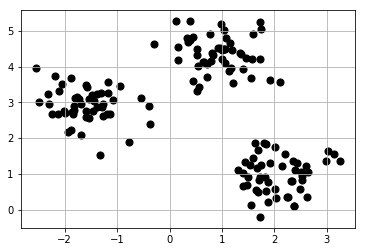

In [41]:
'''
Learning by doing
'''
import os
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150,
                 n_features=2,
                 centers=3,
                 cluster_std=0.5,
                 shuffle=True,
                 random_state=0)

import matplotlib.pyplot as plt
plt.scatter(X[:, 0],
           X[:, 1],
           c='black',
           marker='o',
           s=50)
plt.grid()
plt.show()
# save('dataset')
plt.gcf().clear()

In [34]:
'''apply k-means algorithm to our dataset'''
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,
           init='random',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)
y_km = km.fit_predict(X)

## Shortcomings of K-means
1. the classic k-means algorithm that uses a random seed to place the initial centroids, which can sometimes result in bad clusterings or slow convergence if the initial centroids are chosen poorly. Methods to solve this are: _run kmeans multiple times and select the best performing model in terms of SSE._ __OR__ _place the initial centroids far away from each other via the k-means++ algorithm, which leads to better and more consistent results._

2. Another problem with k-means is that one or more clusters can be empty. Note that this problem does not exist for k-medoids or fuzzy C-means.

In [35]:
'''implementing k-means++'''
km_plus2 = KMeans(n_clusters=3,
           init='k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)
y_km_plus2 = km.fit_predict(X)

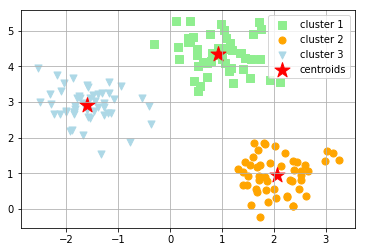

In [43]:
'''visualize the clusters that k-means identified'''
plt.scatter(X[y_km==0, 0],
           X[y_km==0, 1],
           s=50,
           c='lightgreen',
           marker='s',
           label='cluster 1')

plt.scatter(X[y_km==1, 0],
           X[y_km==1, 1],
           s=50,
           c='orange',
           marker='o',
           label='cluster 2')

plt.scatter(X[y_km==2, 0],
           X[y_km==2, 1],
           s=50,
           c='lightblue',
           marker='v',
           label='cluster 3')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            c='red',
            s=250,
            marker='*',
            label='centroids')

plt.legend()
plt.grid()
plt.show()
# saveimg('k-means-plot')
plt.gcf().clear()

## Hard versus Soft clustering
* Hard clustering describes a family of algorithms where each sample in a dataset is assigned to __exactly one cluster__, as in the k-means algorithm.
* In contrast, algorithms for soft clustering (sometimes also called fuzzy clustering) assign a sample to __one or more clusters.__
* A popular example of soft clustering is the __fuzzy C-means (FCM) algorithm__ (also called soft k-means or fuzzy k-means).

## Using the elbow method to find the optimal number of clusters
In order to quantify the quality of clustering, we need to use intrinsic metrics—such as the within-cluster SSE (distortion), to compare the performance of different k-means clusterings.

In [44]:
'''the `inertia_` method return the within-cluster SSE'''
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


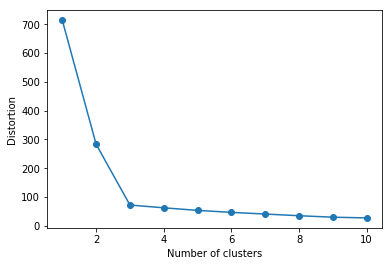

In [47]:
"""
Elbow Method
------------
If k increases, the distortion will decrease.
"""
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
# saveimg('elbow-plot')
plt.gcf().clear()

## Quantifying the quality of clustering via silhouette plots
Silhouette analysis can be used as a graphical tool to plot a measure of how tightly grouped the samples in the clusters are.

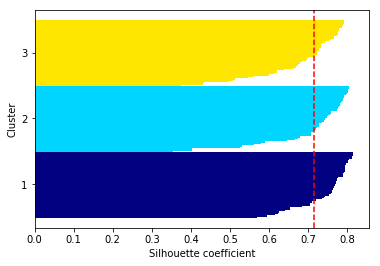

In [64]:
"""
Silhouette analysis
"""
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km,
                                     metric='euclidean')
# plot the silhouette analysis
y_ax_lower, y_ax_upper = 0,0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
color="red",
linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()
# saveimg('silhouette-analysis')
plt.gcf().clear()

__Conclusion__: The silhouette coefficients are not even close to 0, which can be an indicator of a good clustering. Furthermore, to summarize the goodness of our clustering, we added the average silhouette coefficient to the plot (dotted line).

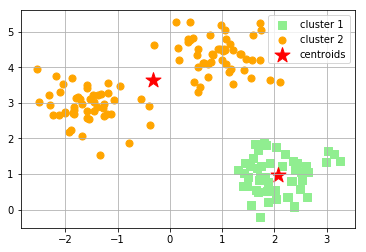

In [72]:
"""
Let's plot the silhouette analysis for bad clustering
"""
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km==0,0],
            X[y_km==0,1],
            s=50, c='lightgreen',
            marker='s',
            label='cluster 1')

plt.scatter(X[y_km==1,0],
            X[y_km==1,1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')

plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s=250,
            marker='*',
            c='red',
            label='centroids')
plt.legend()
plt.grid()
plt.show()
# saveimg('bad-clustering')
plt.gcf().clear()

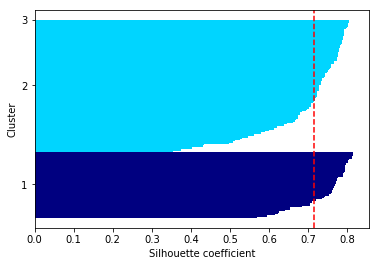

In [75]:
# plot the silhouette analysis
y_ax_lower, y_ax_upper = 0,0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
color="red",
linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()
# saveimg('silhouette-bad-clustering')
plt.gcf().clear()

## Organizing clusters as a hierarchical tree
* The two main approaches to hierarchical clustering are __agglomerative__ and __divisive__ hierarchical clustering.
* In divisive hierarchical clustering, we start with one clusterthat encompasses all our samples, and we iteratively split the cluster into smaller clusters until each cluster only contains one sample.
* The two standard algorithms for agglomerative hierarchical clustering are __single linkage__ and __complete linkage.__

### Agglomerative clustering (using complete linkage approach)
1. Compute the distance matrix of all the clusters.
2. Represent each data point as a singleton cluster
3. Merge the two closest clusters based on the distance of the most dissimilar members.
4. Update the similarity matrix.
5. Repeat steps 2 to 4 until one single cluster remains.

In [76]:
'''
Computing the distance matrix.
'''
import pandas as pd
import numpy as np
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0','ID_1','ID_2','ID_3','ID_4']
X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


## Performing hierarchical clustering on a distance matrix

In [77]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(
                        pdist(df, metric='euclidean')),
                       columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [78]:
"""
Apply complete linkage agglomeration to the clusters.
"""
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(pdist(df, metric='euclidean'),
                      method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1',
                      'row label 2',
                      'distance',
                      'no. of items in clust.'],
             index=['cluster %d' %(i+1) for i in
                    range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


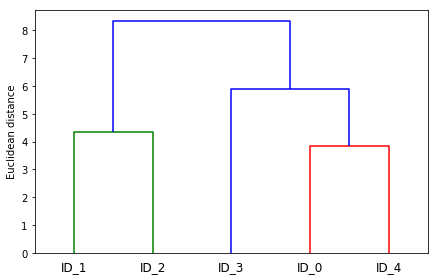

In [89]:
"""
visualize the results in the form of a dendrogram
"""
from scipy.cluster.hierarchy import dendrogram
# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])
row_dendr = dendrogram(row_clusters,
                     labels=labels,
                     # make dendogram black(part 2/2)
                     # color_threshold=np.inf
                     )
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()
# saveimg('dendrogram')
plt.gcf().clear()

## Attaching dendrograms to a heat map

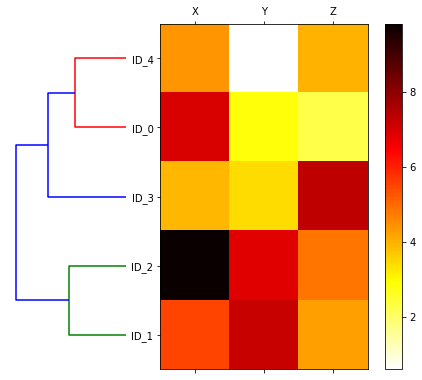

In [95]:
# 1. We create a new figure object and define the x axis position, y axis
#    position, width, and height of the dendrogram via the add_axes attribute.
#    Furthermore, we rotate the dendrogram 90 degrees counter-clockwise.
fig = plt.figure(figsize=(8,8))
axd = fig.add_axes([0.09,0.1,0.2,0.6])
row_dendr = dendrogram(row_clusters, orientation='left')

# 2. Next we reorder the data in our initial DataFrame according to the clustering
#    labels that can be accessed from the dendrogram object, which is essentially a
#    Python dictionary, via the leaves key.
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

# 3. Now we construct the heat map from the reordered DataFrame and position
#    it right next to the dendrogram
axm = fig.add_axes([0.23,0.1,0.6,0.6])
cax = axm.matshow(df_rowclust,
                  interpolation='nearest', cmap='hot_r')

# 4. Finally we will modify the aesthetics of the heat map by removing the axis
#    ticks and hiding the axis spines. Also, we will add a color bar and assign
#    the feature and sample names to the x and y axis tick labels, respectively.
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()
# saveimg('dendrogram-plus-heatmap')
plt.gcf().clear()

## Applying agglomerative clustering via scikit-learn

In [97]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2,
                            affinity='euclidean',
                            linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


## Locating regions of hight density using DBSCAN
DBSCAN stands for _Density-based Spatial Clustering of Applications with Noise_

In DBSCAN, a special label is assigned to each sample (point) using the
following criteria:
* A point is considered as core point if at least a specified number (MinPts) of neighboring points fall within the specified radius ε
* A border point is a point that has fewer neighbors than MinPts within but lies within the ε radius of a core point ε ,
* All other points that are neither core nor border points are considered as noise points

After labeling the points as core, border, or noise points, the DBSCAN algorithm can
be summarized in two simple steps:
1.	 Form a separate cluster for each core point or a connected group of core
points (core points are connected if they are no farther away than ε ).
2.	 Assign each border point to the cluster of its corresponding core point.

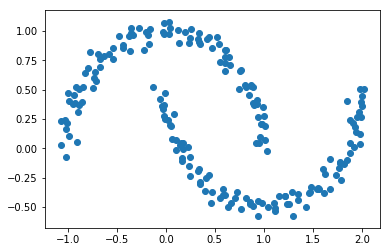

In [101]:
"""
create a new dataset of half-moon-shaped structures to compare
k-means clustering, hierarchical clustering, and DBSCAN
"""
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200,
                 noise=0.05,
                 random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.show()
# saveimg('half-moon-dataset')
plt.gcf().clear()

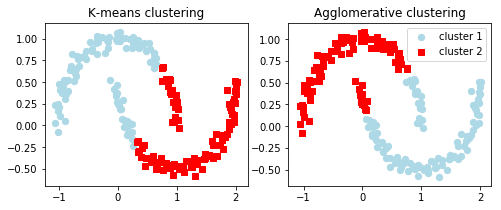

In [105]:
"""
k-means algorithm and complete linkage clustering
"""

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
km = KMeans(n_clusters=2,
           random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0,0],
            X[y_km==0,1],
            c='lightblue',
            marker='o',
            s=40,
            label='cluster 1')
ax1.scatter(X[y_km==1,0],
            X[y_km==1,1],
            c='red',
            marker='s',
            s=40,
            label='cluster 2')
ax1.set_title('K-means clustering')
ac = AgglomerativeClustering(n_clusters=2,
                            affinity='euclidean',
                            linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0,0],
            X[y_ac==0,1],
            c='lightblue',
            marker='o',
            s=40,
            label='cluster 1')
ax2.scatter(X[y_ac==1,0],
            X[y_ac==1,1],
            c='red',
            marker='s',
            s=40,
            label='cluster 2')
ax2.set_title('Agglomerative clustering')
plt.legend()
plt.show()
# saveimg('kmeans-agglomerative-performance')
plt.gcf().clear()

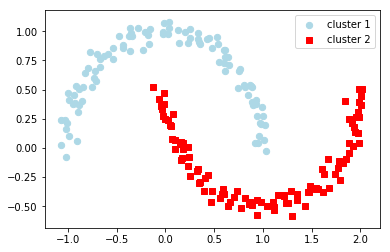

In [109]:
"""
using DBSCAN algorithm
"""
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2,
           min_samples=5,
           metric='euclidean'
           )
y_db = db.fit_predict(X)

# plot the graphs
plt.scatter(X[y_db==0,0],
            X[y_db==0,1],
            c='lightblue',
            marker='o',
            s=40,
            label='cluster 1')
plt.scatter(X[y_db==1,0],
            X[y_db==1,1],
            c='red',
            marker='s',
            s=40,
            label='cluster 2')
plt.legend()
plt.show()
# saveimg('DBSCAN-performance')
plt.gcf().clear()

## Disadvantages of DBSCAN
1. With an increasing number of features in our dataset—given a fixed size training set—the negative effect of the curse of dimensionality increases.
2. This is especially a problem if we are using the Euclidean distance metric.
3. Finding a good combination of MinPts and ε can be problematic if the density differences in the dataset are relatively large.